#**Global SHAP Values**
Global SHAP (SHapley Additive exPlanations) values provide a comprehensive view of how features in a model influence its predictions across the entire dataset, rather than explaining individual predictions. This approach helps in understanding the overall behavior of the model, identifying patterns, and pinpointing which features are most important globally. Here's a deeper look into global SHAP values and their significance:

#Understanding Global SHAP Values#
- Aggregate Insights: While local SHAP values explain individual predictions by quantifying each feature's contribution, global SHAP values aggregate these contributions across all instances. This aggregation helps in identifying which features generally have the most significant impact on the model's predictions.
- Feature Importance: One common use of global SHAP values is to rank features by their importance. This is typically done by taking the absolute SHAP values across all predictions and averaging them for each feature. The result highlights which features, on average, most strongly influence the model's output.
- Feature Effect: Beyond importance, global SHAP values can also reveal the effect of features on the model's predictions. By analyzing the distribution of SHAP values for each feature, you can see whether a feature tends to increase or decrease the prediction and how this effect varies across the dataset.

#Visualization Techniques#
Several visualization techniques are used with global SHAP values to convey these insights:

- Summary Plot: Shows the distribution of the SHAP values for each feature across all data points. It combines feature importance with the direction of the feature's effect on the model's output, offering a nuanced view of how features impact predictions.
- Beeswarm Plot: A specific type of summary plot that displays individual SHAP values as dots, which cluster into "swarms" for each feature. This plot can reveal the density of the SHAP values, highlighting how frequently features contribute to increasing or decreasing predictions.
- Bar Plot: Aggregates SHAP values to show the average impact of each feature on the model's output, ranked by importance. This simplifies understanding which features are most influential globally but doesn't show the distribution of effects.

#Significance of Global SHAP Values#
- Transparency and Trust: By providing a clear picture of which features are most influential and how they affect predictions, global SHAP values enhance transparency and can help build trust in the model among stakeholders.
- Model Debugging and Improvement: Identifying features with unexpectedly high or low importance can signal data issues or suggest opportunities for model refinement.
- Regulatory Compliance: In regulated industries, understanding and documenting how models make decisions is often required. Global SHAP values offer a rigorous, model-agnostic method for meeting these requirements.

Limitations
While powerful, global SHAP values aggregate complex, individual interactions into broader insights, which may overlook nuanced relationships or interactions between features. As with any interpretability method, they should be used as part of a broader analysis that considers the model's context, data quality, and potential biases.

In summary, global SHAP values are a critical tool in the interpretability toolkit, offering a high-level understanding of model behavior that complements the detailed insights provided by local explanations.

#How the Code Works:#
- The code first trains an ExtraTreesRegressor model on the Iris dataset.
- It then uses SHAP to interpret the model, focusing both on individual predictions (local interpretability) and on the overall model behavior (global interpretability).
- SHAP values help understand the contribution of each feature to the prediction, offering insights into the model's decision-making process.

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.5 MB/s eta 0:00:00


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


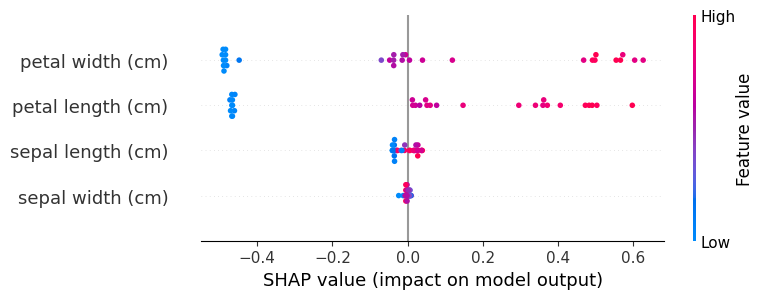

In [ ]:
# Import statements
import shap, matplotlib.pyplot as plt, pandas as pd, numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert data to pandas dataframe as in question
X = pd.DataFrame(data=X, columns=iris.feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8, test_size=0.2)

## Creating model per question
extra_tree = ExtraTreesRegressor(random_state=42, verbose=2)
extra_tree.fit(X_train, y_train)

# Create Explainer
explainer = shap.TreeExplainer(extra_tree)

# Visualize all values
shap_values = explainer(X_test)
shap.summary_plot(shap_values, feature_names=X_test.columns)
plt.show()

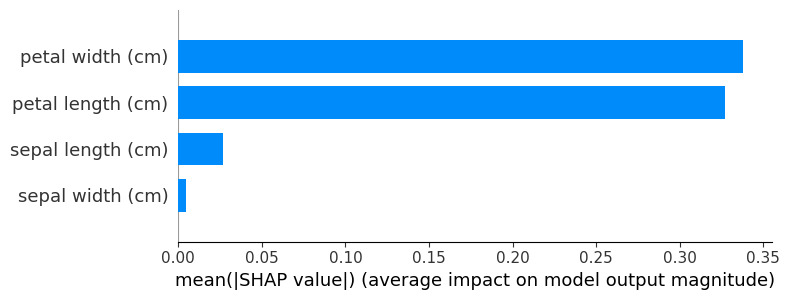

In [ ]:
# prompt: barchart shap_values

shap.summary_plot(shap_values, feature_names=X_test.columns, plot_type="bar")
